In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras.models import load_model
from PIL import Image, ImageOps

In [2]:
model = load_model('../model_poker_card.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


([], <a list of 0 Text yticklabel objects>)

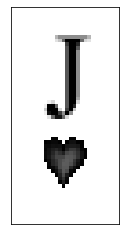

In [25]:
im = Image.open('../png/H11.png')
im2 = im.crop((6, 6, 36, 66))
im5 = im2.convert('L')
im6 = ImageOps.invert(im5)
img_arr = np.array(im6)

plt.imshow(img_arr, cmap='Greys', interpolation='nearest')
plt.xticks([])
plt.yticks([])

#print(f"Predict : {model.predict_classes(img_arr)}")

In [26]:
x_arr = img_arr.reshape(1, 30 * 60)

In [9]:
print(f"Predict : {model.predict_classes(x_arr)}")

Predict : [50]


In [10]:
def get_label():
    label = list()
    for j, k in enumerate(('D', 'C', 'H', 'S')):
        for i in range(12):
            label.append(f"{k}{i + 2:02}.png")
        label.append(f"{k}01.png")
    label.sort()
    return label

In [11]:
lables = get_label()

In [12]:
print(lables[50])

S12.png


In [27]:
idx = model.predict_classes(x_arr)[0]

In [28]:
print(f"Predict : {lables[idx]}")

Predict : H11.png


### 저장된 모델을 이용한 예측 확인

* 하나하나 추적하여 동작여부 검증
* 이상적인 상태에서 모델이 문제없이 동작하는지 확인
* 실전에 사용하기에는 실측 데이터 검증을 선행할 필요가 있음.
* 위에서 빠지 부분
  - x_arr = x_arr.astype('float32') / 255.